In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../01.files/02.Bigsata_analysis/체질검사.csv", encoding = 'euc-kr')

df[['WEIGHT', 'WEIGHT_UNIT']] = df['WEIGHT'].str.split(expand = True)
df[['HEIGHT', 'HEIGHT_UNIT']] = df['HEIGHT'].str.split(expand = True)
df['WEIGHT'] = df['WEIGHT'].astype('float64')
df['HEIGHT'] = df['HEIGHT'].astype('float64')
df.info()
df = df.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)

df = pd.get_dummies(df)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_남성,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,1,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,1,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,1,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,0,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,0,1


In [7]:
df_y = df['FAT']
df_x = df.drop(['FAT'], axis = 1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=777)

print("df_train_x:",df_train_x.shape)
print("df_test_x:",df_test_x.shape)
print("df_train_y:",df_train_y.shape)
print("df_test_y:",df_test_y.shape)

df_train_x: (176, 15)
df_test_x: (76, 15)
df_train_y: (176,)
df_test_y: (76,)


In [9]:
rf_uncustomized = RandomForestRegressor(random_state = 777)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.959
Score on test set: 0.651


In [19]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=777, n_estimators= v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimaors"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score    

In [20]:
df_score_n.round(3)

,n_estimaors,TrainScore,TestScore
0,10,0.943,0.663
1,20,0.954,0.654
2,30,0.955,0.648
3,40,0.955,0.651
4,50,0.956,0.648
5,60,0.957,0.649
6,70,0.958,0.648
7,80,0.959,0.646
8,90,0.959,0.650
9,100,0.959,0.651


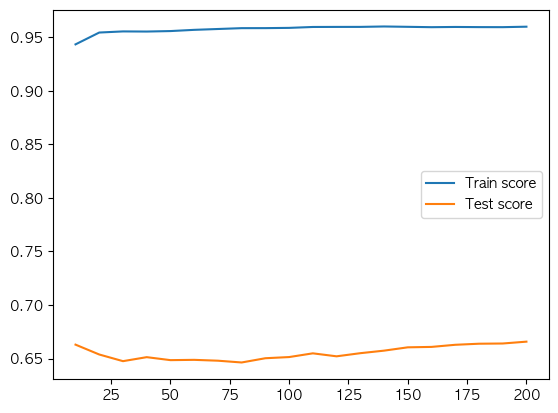

In [21]:
plt.plot(para_n_tree, train_score, label = "Train score")
plt.plot(para_n_tree, test_score, label = "Test score")
plt.legend()
plt.show()

In [28]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples in para_leaf:
    rf = RandomForestRegressor(random_state=777, n_estimators= 200, min_samples_leaf= v_min_samples)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_n_tree
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score    

In [29]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.959,0.651
1,20,0.942,0.644
2,30,0.919,0.643
3,40,0.895,0.650
4,50,0.876,0.652
5,60,0.857,0.654
6,70,0.838,0.655
7,80,0.822,0.653
8,90,0.807,0.652
9,100,0.790,0.652


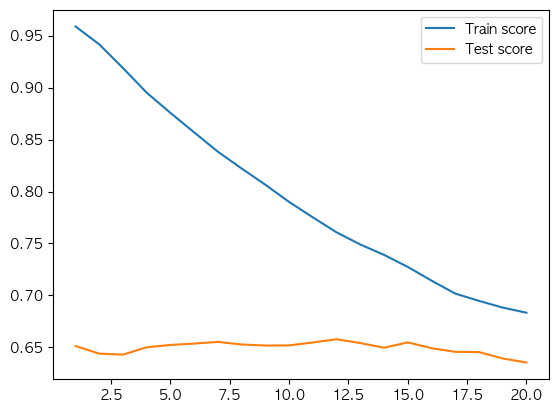

In [30]:
plt.plot(para_leaf, train_score, label = "Train score")
plt.plot(para_leaf, test_score, label = "Test score")
plt.legend()
plt.show()

In [31]:
train_score = []
test_score = []

para_depth = [depth for depth in range(3,10)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=777, n_estimators= 200, min_samples_leaf= 10, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["MinSamplesSplit"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score    

In [32]:
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,3,0.771,0.659
1,4,0.789,0.664
2,5,0.791,0.665
3,6,0.791,0.665
4,7,0.791,0.665
5,8,0.791,0.665
6,9,0.791,0.665


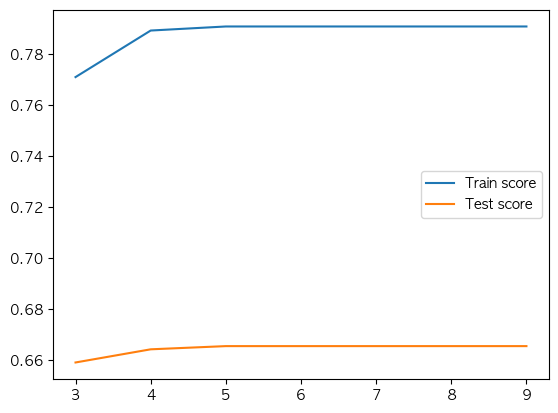

In [34]:
plt.plot(para_depth, train_score, label = "Train score")
plt.plot(para_depth, test_score, label = "Test score")
plt.legend()
plt.show()

In [37]:
rf_final = RandomForestRegressor(random_state=777, n_estimators = 100, min_samples_leaf = 10,
                                 min_samples_split = 14, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.788
Score on test set: 0.649


In [52]:
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y.values[:10])
print('test data의 예측값 : \n', test_pred[:10].round(3))

test data의 실제값 : 
 [21.  21.3 24.9 16.7 19.5 22.4 12.9 25.8 20.4 23.3]
test data의 예측값 : 
 [23.92  23.949 23.928 15.858 14.14  17.993 11.699 23.862 20.791 18.636]


In [50]:
type(df_test_y)

pandas.core.series.Series

In [62]:
from itertools import product

def generate_param_combinations(param_grid):
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())
    
    combinations = list(product(*param_values))
    
    param_combinations = []
    for combination in combinations:
        param_combinations.append(dict(zip(param_names, combination)))
    
    return param_combinations

def run_models(params, train_x, train_y, test_x, test_y, param_name):
    train_score = []
    test_score = []

    params_comb = generate_param_combinations(params)
    for i in params_comb:
        model = RandomForestRegressor(random_state = 777, 
                                          n_estimators= i['n_estimators'], 
                                          min_samples_leaf= i['min_samples_leaf'], 
                                          min_samples_split= i['min_samples_split'],
                                          max_depth= i['max_depth'])
        model.fit(train_x, train_y)
        train_score.append(model.score(train_x, train_y))
        test_score.append(model.score(test_x, test_y))
    df_score = pd.DataFrame()
    df_score[param_name] = params[param_name]
    df_score["TrainScore"] = train_score
    df_score["TestScore"] = test_score    

    plt.plot(params[param_name], train_score, label = "Train score")
    plt.plot(params[param_name], test_score, label = "Test score")
    plt.legend()
    plt.show()
    
    return df_score

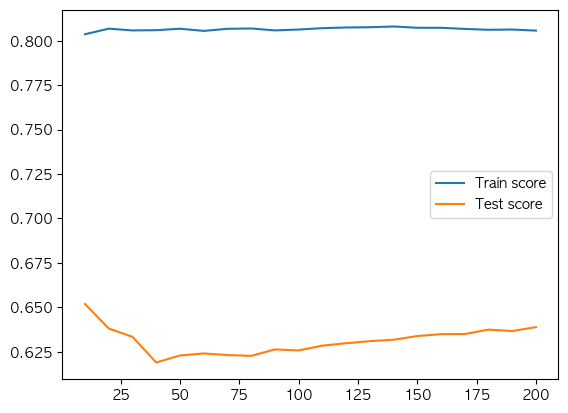

,n_estimators,TrainScore,TestScore
0,10,0.803631,0.651884
1,20,0.806762,0.638130
2,30,0.805768,0.633420
3,40,0.805910,0.619003
4,50,0.806725,0.622932
5,60,0.805499,0.624079
6,70,0.806682,0.623191
7,80,0.806867,0.622720
8,90,0.805781,0.626337
9,100,0.806265,0.625768


In [63]:
hyperparameters = {
    'n_estimators' : [n_tree * 10 for n_tree in range(1, 21)],
    'min_samples_leaf' : [1],
    'min_samples_split' : [2],
    'max_depth' : [3]
}         

df_score_d = run_models(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, 'n_estimators')
df_score_d

In [65]:
hyperparameters['n_estimators'] = [40]
hyperparameters['min_samples_leaf'] = [n_leaf for n_leaf in range(1,21)]
hyperparameters

{'n_estimators': [40],
 'min_samples_leaf': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20],
 'min_samples_split': [2],
 'max_depth': [3]}

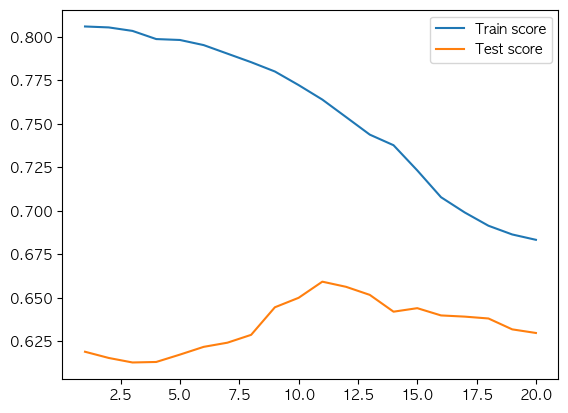

,min_samples_leaf,TrainScore,TestScore
0,1,0.805910,0.619003
1,2,0.805369,0.615430
2,3,0.803366,0.612835
3,4,0.798676,0.613126
4,5,0.798152,0.617363
5,6,0.795210,0.621812
6,7,0.790298,0.624206
7,8,0.785389,0.628717
8,9,0.780043,0.644551
9,10,0.772240,0.649991


In [66]:
df_score_d = run_models(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, 'min_samples_leaf')
df_score_d